In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('bank_full.csv', delimiter=';')  ## the file was semicolon seperated

In [3]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print(f'Dataset have {df.shape[0]} rows and {df.shape[1]} columns')

Dataset have 41188 rows and 21 columns


In [5]:
print("Information about the dataset:")
df.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  

In [6]:
print("Summary statistics for numeric columns")
df.describe().T

Summary statistics for numeric columns


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
df['OUTPUT_LABEL'] = (df.y == 'yes').astype('int')

In [8]:
df['OUTPUT_LABEL'].value_counts()

OUTPUT_LABEL
0    36548
1     4640
Name: count, dtype: int64

In [9]:
df = df.drop('y', axis=1)

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,OUTPUT_LABEL
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [11]:
print('Number of columns:',len(df.columns))

Number of columns: 21


In [12]:
for a in list(df.columns):
    
    
    n = df[a].unique()
    
    
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 78 unique values
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544 unique values
campaign: 42 unique values
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]
poutcome
['nonexistent' 'failure' 'success']
emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.

In [13]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
OUTPUT_LABEL      0
dtype: int64

Text(0.5, 1.0, 'Missing values in the dataset with respect to its features')

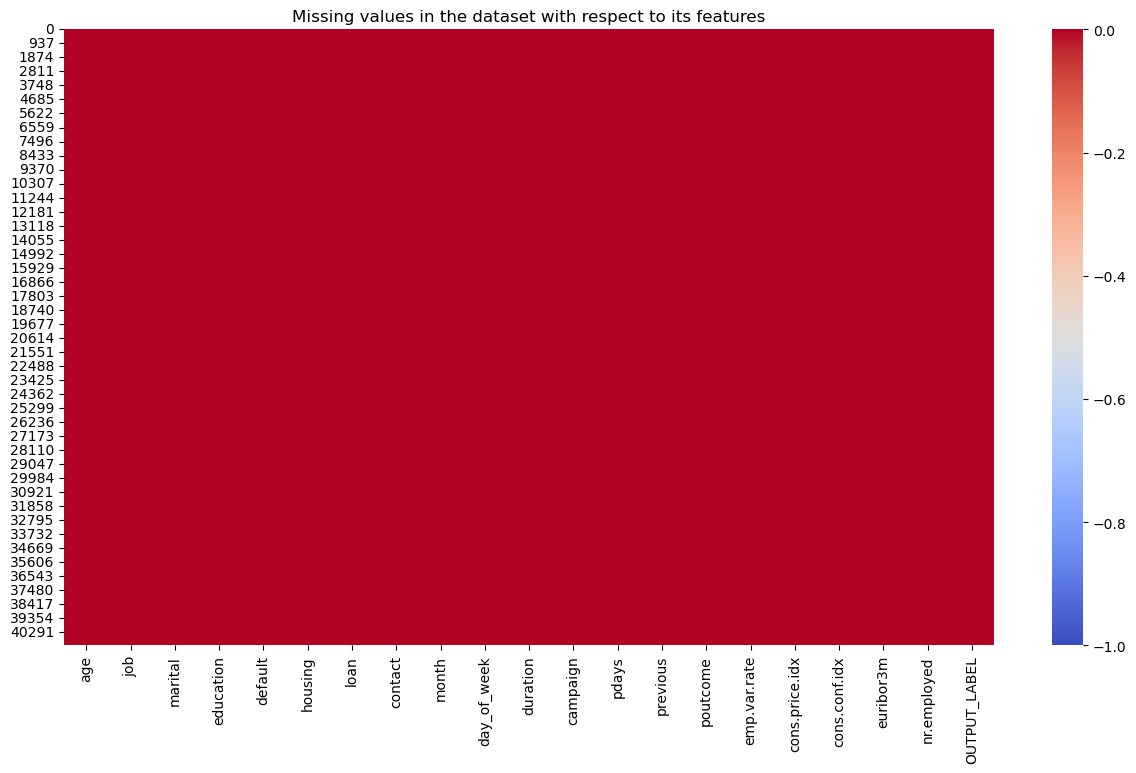

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cbar=True,vmin=-1, cmap='coolwarm')
plt.title('Missing values in the dataset with respect to its features')

In [15]:
df.duplicated().sum()

12

In [16]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [17]:
#dtypes: float64(5), int64(6), object(10)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [18]:
numerical_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [19]:
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

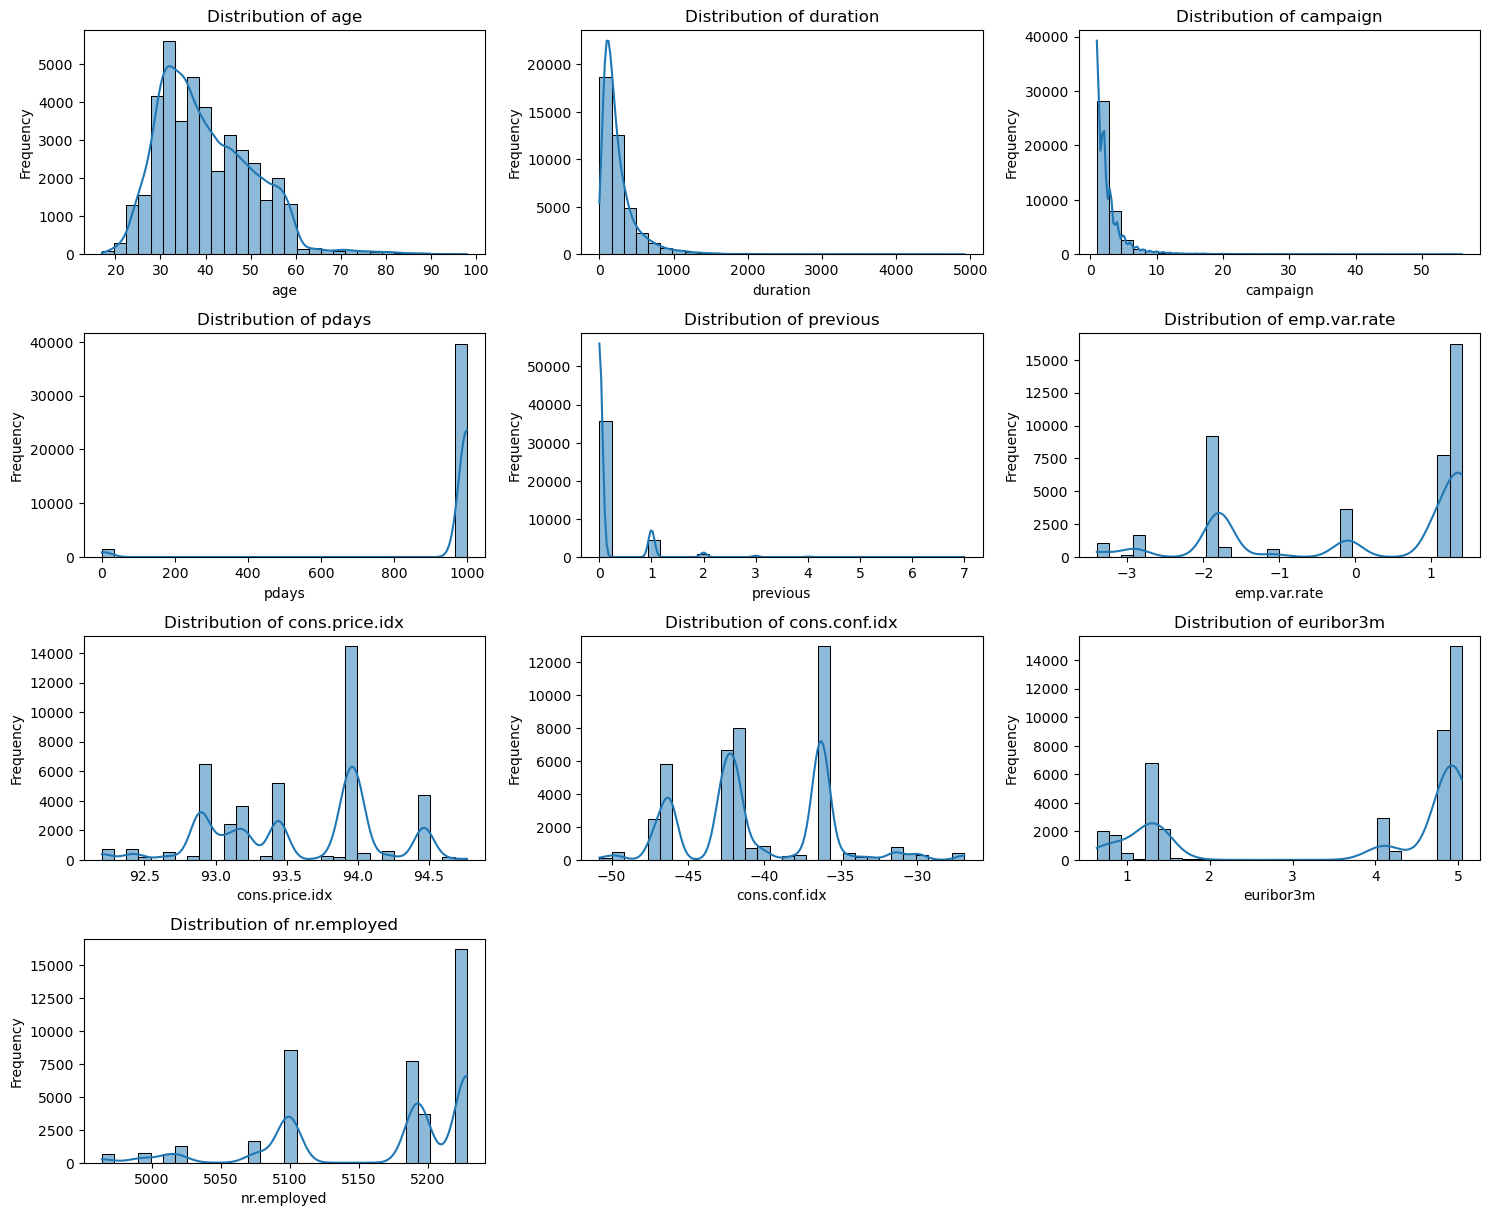

In [20]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 30))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


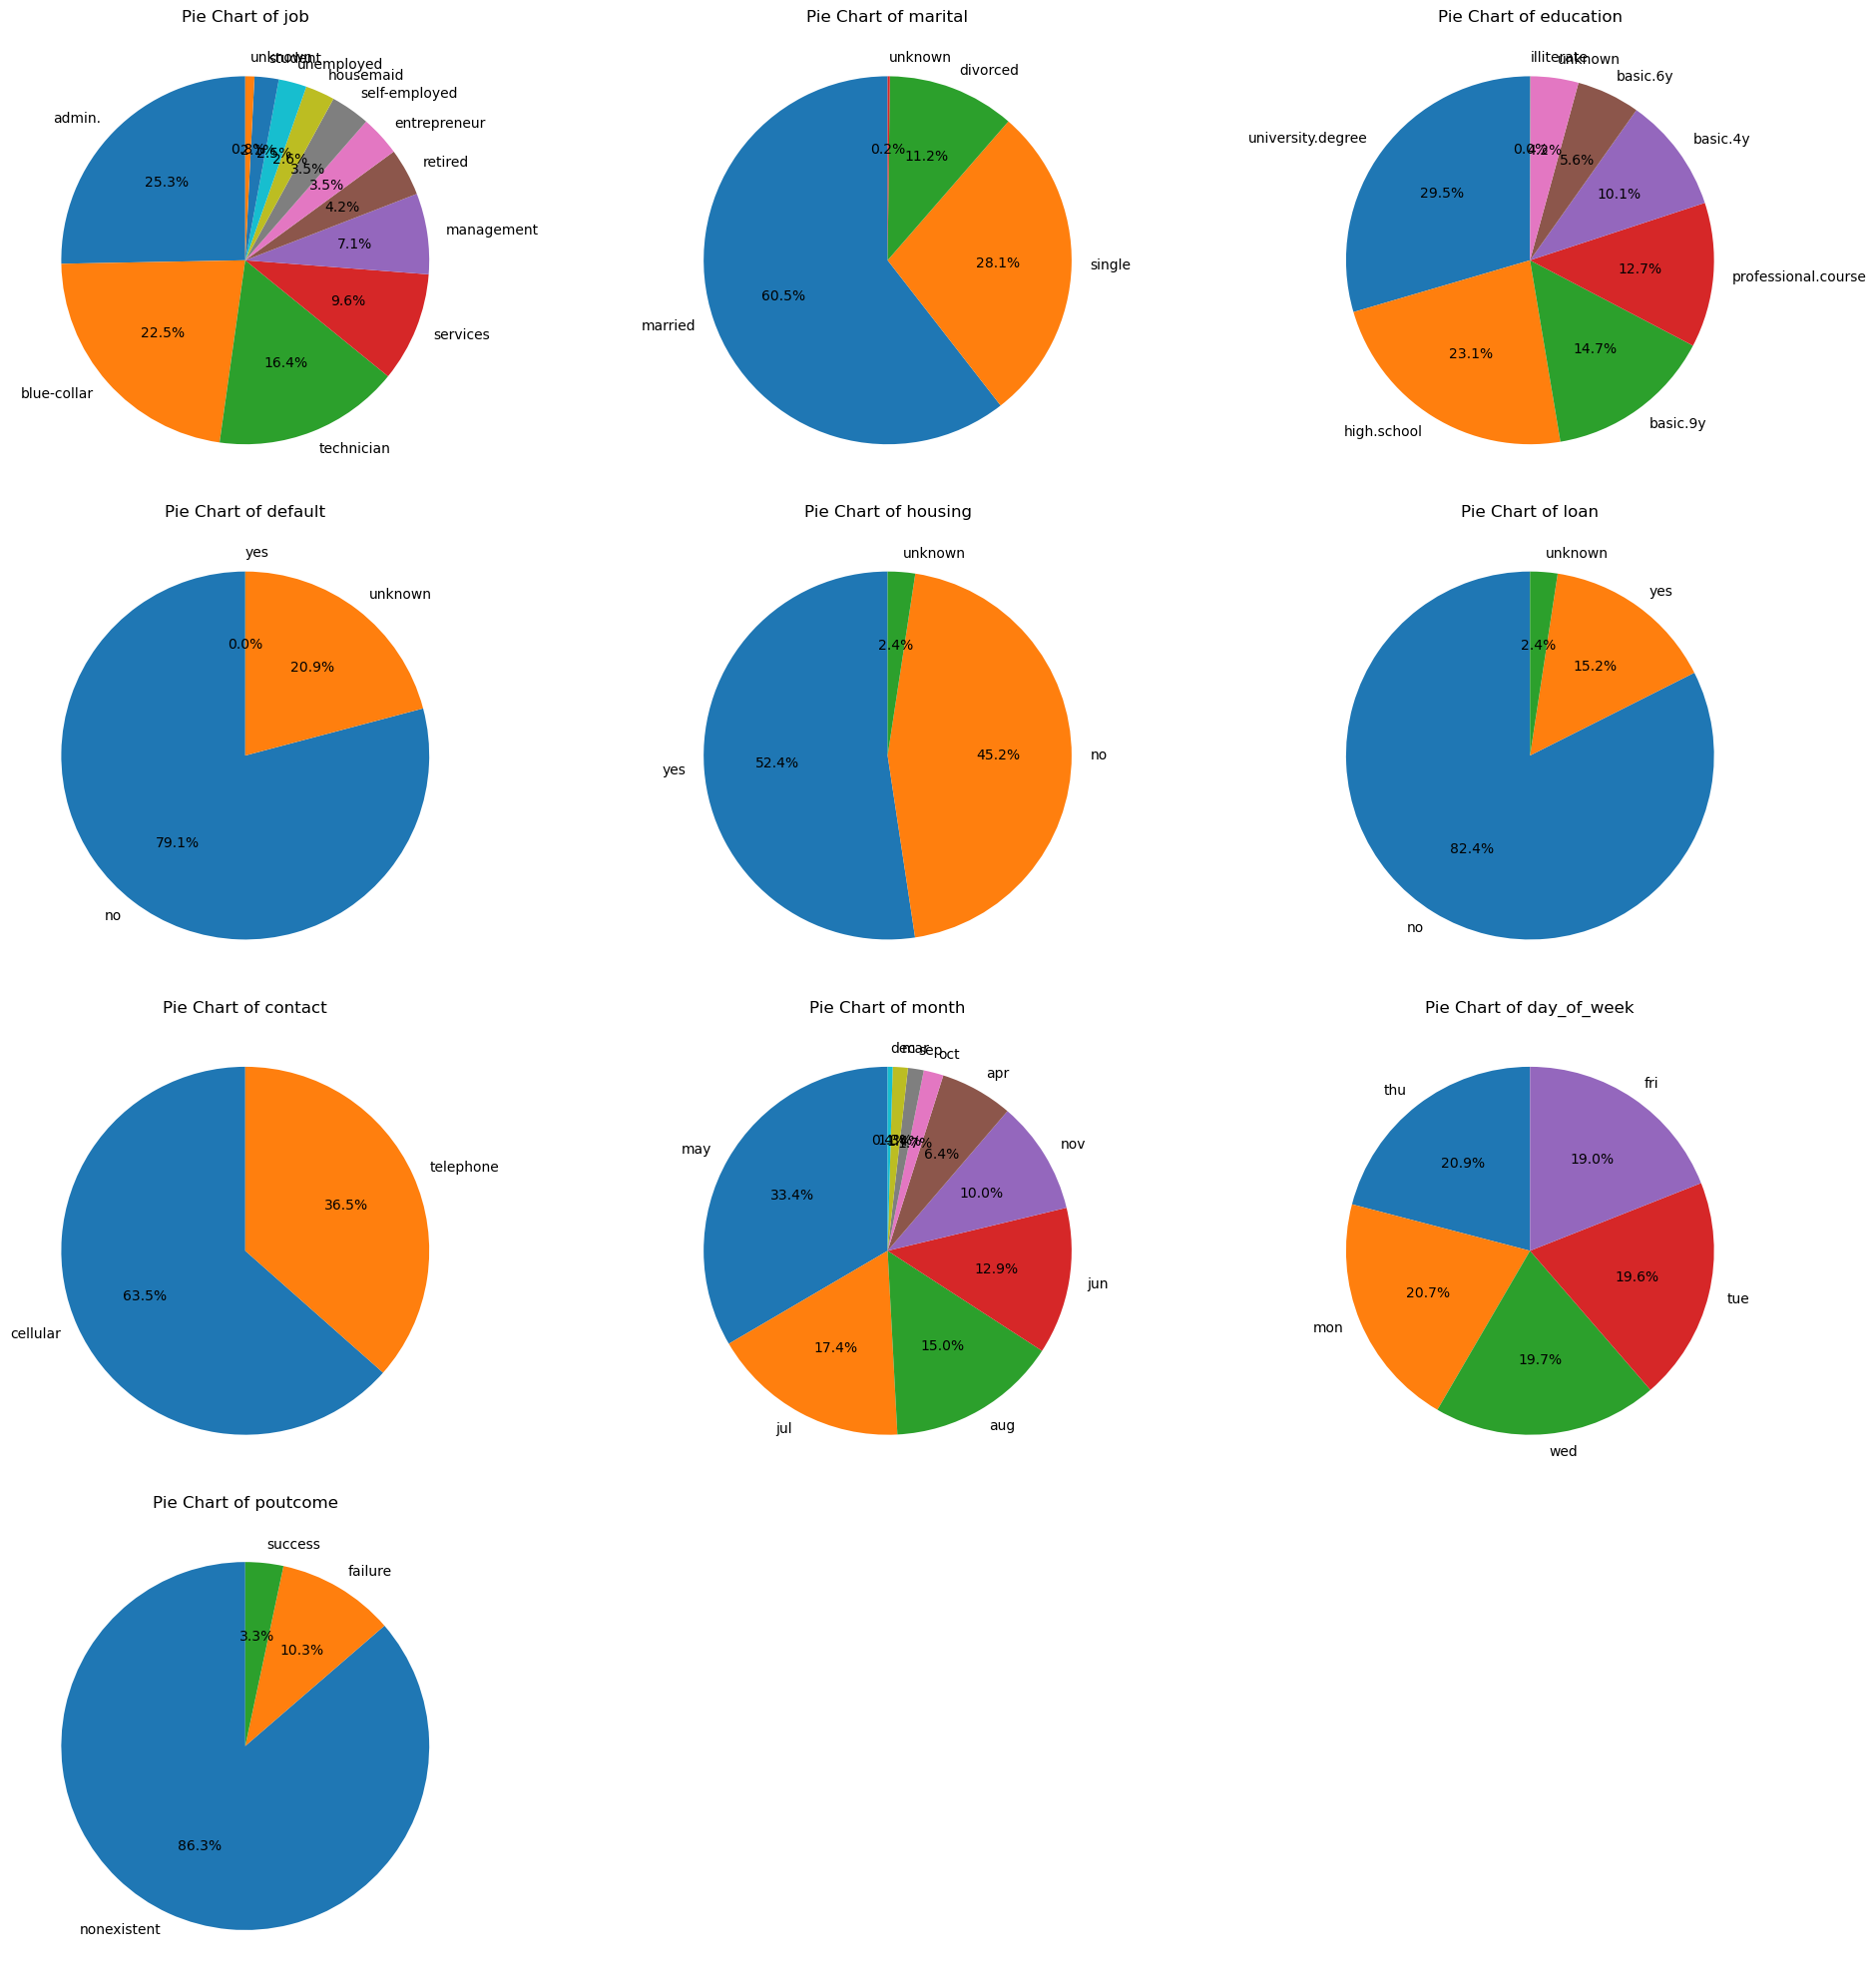

In [21]:
plt.figure(figsize=(20, 20)) 

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)  
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  

plt.tight_layout()
plt.show()

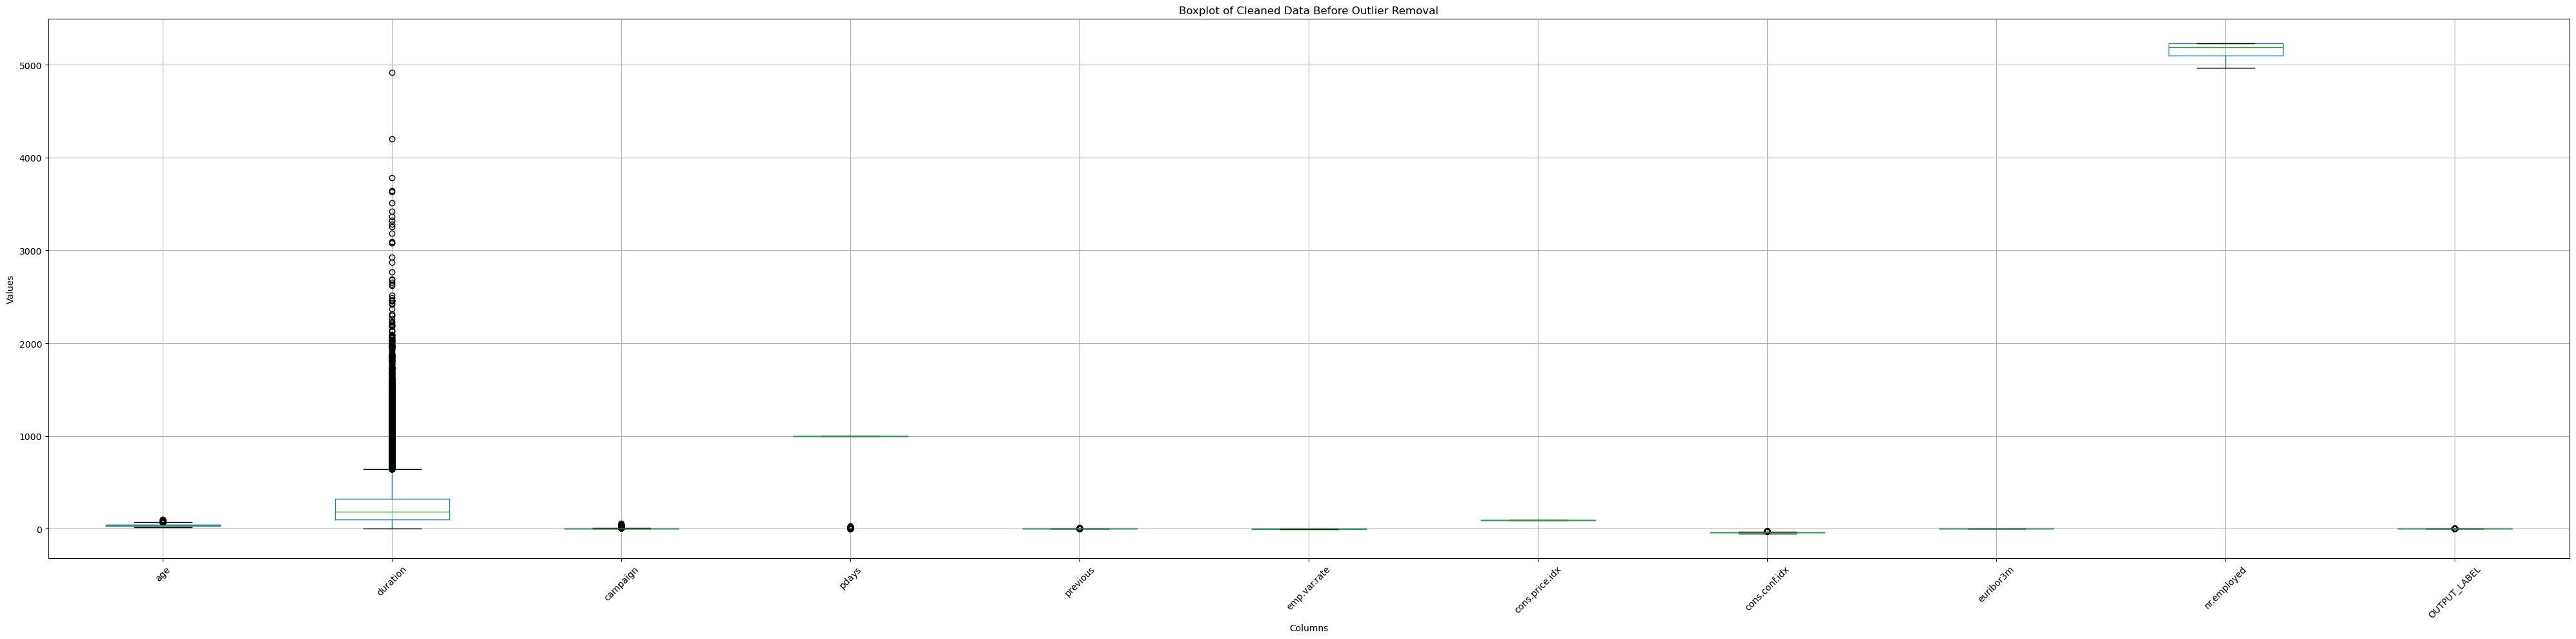

In [22]:
def boxplot_before(df):
    df.boxplot(figsize=(40, 10))
    plt.title('Boxplot of Cleaned Data Before Outlier Removal')
    plt.xticks(rotation=45)
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()


boxplot_before(df)

In [23]:
def remove_outliers_iqr(df):
    
    numerical_cols = df.select_dtypes(include=['number']).columns
    df_numerical = df[numerical_cols]

    Q1 = df_numerical.quantile(0.25)
    Q3 = df_numerical.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    mask = ~((df_numerical < lower_bound) | (df_numerical > upper_bound)).any(axis=1)
    
    
    df_no_outliers = df[mask]
    return df_no_outliers


cleaned_data = remove_outliers_iqr(df)

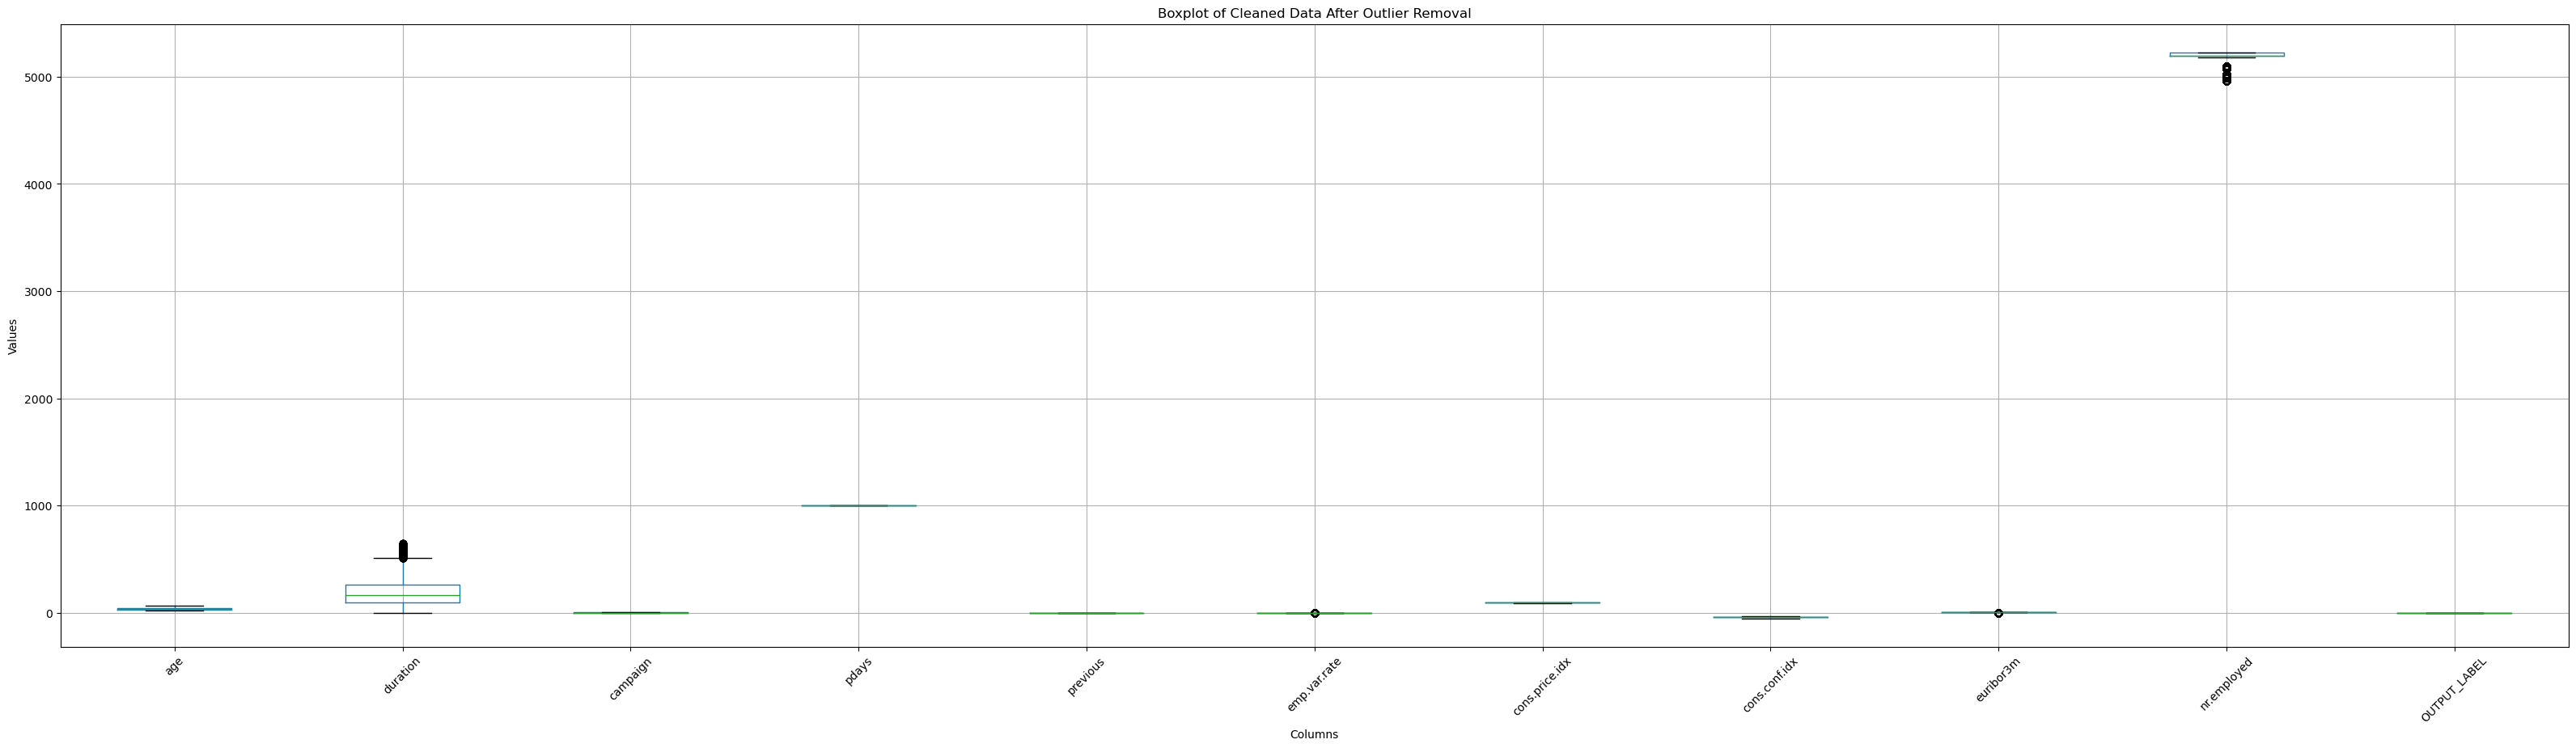

In [24]:
def boxplot_vis(df):
    
    df.boxplot(figsize=(40, 10))
    plt.title('Boxplot of Cleaned Data After Outlier Removal')
    plt.xticks(rotation=45)
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.show()


boxplot_vis(cleaned_data)

# Handling Unknown values

In [25]:
for col in categorical_cols:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print('\n') 

Value counts for column 'job':
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


Value counts for column 'marital':
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64


Value counts for column 'education':
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64


Value counts for column 'default':
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64


Value counts for column 'housing':
housing
yes        21576
no         18622
unknown     

### **Outcome**:
- There are some columns with value "unknown" they are similar to missing value
- So the columns that contain unknow are :

In [26]:
columns_with_unknown = [col for col in df.columns if df[col].isin(['unknown']).any()]
columns_with_unknown

['job', 'marital', 'education', 'default', 'housing', 'loan']

 We can change features with missing value from housing,loan to mode since columns they can be generalized but feature like marital,job,education are facts

In [27]:
unknown_removed=["housing","loan","default"]
for col in unknown_removed:
    mode_value = df[col].mode()[0]
    df[col] = df[col].replace('unknown', mode_value)

In [28]:
for col in unknown_removed:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print('\n') 

Value counts for column 'housing':
housing
yes    22566
no     18622
Name: count, dtype: int64


Value counts for column 'loan':
loan
no     34940
yes     6248
Name: count, dtype: int64


Value counts for column 'default':
default
no     41185
yes        3
Name: count, dtype: int64




# Handling Categorical Values

In [29]:
df['month'].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

Inference: Since the months have a clear order, ordinal encoding is the most appropriate method. It preserves the order of the months while converting them to numerical values.

In [30]:
from sklearn.preprocessing import OrdinalEncoder

month_order = [['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]
ordinal_encoder = OrdinalEncoder(categories=month_order)

df['month_encoded'] = ordinal_encoder.fit_transform(df[['month']])

df[['month', 'month_encoded']].head()

,month,month_encoded
0,may,4.0
1,may,4.0
2,may,4.0
3,may,4.0
4,may,4.0


In [31]:
df = df.drop('month', axis=1)

In [32]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'OUTPUT_LABEL', 'month_encoded'],
      dtype='object')

In [33]:
day_order = [['sun','mon', 'tue', 'wed', 'thu', 'fri','sat']]
day_encoder = OrdinalEncoder(categories=day_order)

df['day_of_week_encoded'] = day_encoder.fit_transform(df[['day_of_week']])

df[['day_of_week', 'day_of_week_encoded']].head()

,day_of_week,day_of_week_encoded
0,mon,1.0
1,mon,1.0
2,mon,1.0
3,mon,1.0
4,mon,1.0


In [34]:
df.drop('day_of_week', axis=1)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,OUTPUT_LABEL,month_encoded,day_of_week_encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4.0,1.0
1,57,services,married,high.school,no,no,no,telephone,149,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4.0,1.0
2,37,services,married,high.school,no,yes,no,telephone,226,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4.0,1.0
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4.0,1.0
4,56,services,married,high.school,no,no,yes,telephone,307,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,334,1,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,10.0,5.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,383,1,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,10.0,5.0
41185,56,retired,married,university.degree,no,yes,no,cellular,189,2,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,10.0,5.0
41186,44,technician,married,professional.course,no,no,no,cellular,442,1,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,10.0,5.0


In [35]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,OUTPUT_LABEL,month_encoded,day_of_week_encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,mon,261,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4.0,1.0
1,57,services,married,high.school,no,no,no,telephone,mon,149,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4.0,1.0
2,37,services,married,high.school,no,yes,no,telephone,mon,226,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4.0,1.0
3,40,admin.,married,basic.6y,no,no,no,telephone,mon,151,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4.0,1.0
4,56,services,married,high.school,no,no,yes,telephone,mon,307,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4.0,1.0


In [36]:
cols_cat = ['job', 'marital','education', 'default','housing', 'loan', 'contact','month_encoded', 'day_of_week_encoded', 'poutcome']
df[cols_cat]
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first =False).astype(int)
cols_new_cat.head()

,month_encoded,day_of_week_encoded,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,4,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,4,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
2,4,1,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
3,4,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
4,4,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0


In [37]:
df = pd.concat([df,cols_new_cat], axis = 1)

In [38]:
cols_all_cat=list(cols_new_cat.columns)

In [39]:
df[cols_all_cat].head()

,month_encoded,month_encoded,day_of_week_encoded,day_of_week_encoded,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,4.0,4,1.0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
1,4.0,4,1.0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,4.0,4,1.0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
3,4.0,4,1.0,1,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
4,4.0,4,1.0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0


In [40]:
df[cols_all_cat].columns

Index(['month_encoded', 'month_encoded', 'day_of_week_encoded',
       'day_of_week_encoded', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [41]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'OUTPUT_LABEL', 'month_encoded',
       'day_of_week_encoded', 'month_encoded', 'day_of_week_encoded',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cell

In [42]:
df['OUTPUT_LABEL'].value_counts()

OUTPUT_LABEL
0    36548
1     4640
Name: count, dtype: int64

Summary of Features Engineering

In [43]:
numerical_cols_list = list(numerical_cols)
cols_all_cat_list = list(cols_all_cat)

In [44]:
print('Total number of features:', len(cols_all_cat_list + numerical_cols_list))
print('Numerical Features:',len(numerical_cols_list))
print('Categorical Features:',len(cols_all_cat_list))

Total number of features: 47
Numerical Features: 10
Categorical Features: 37


In [45]:
cols_input = numerical_cols_list + cols_all_cat_list
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [46]:
cols_input

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'month_encoded',
 'day_of_week_encoded',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [47]:
print(len(cols_input))

47


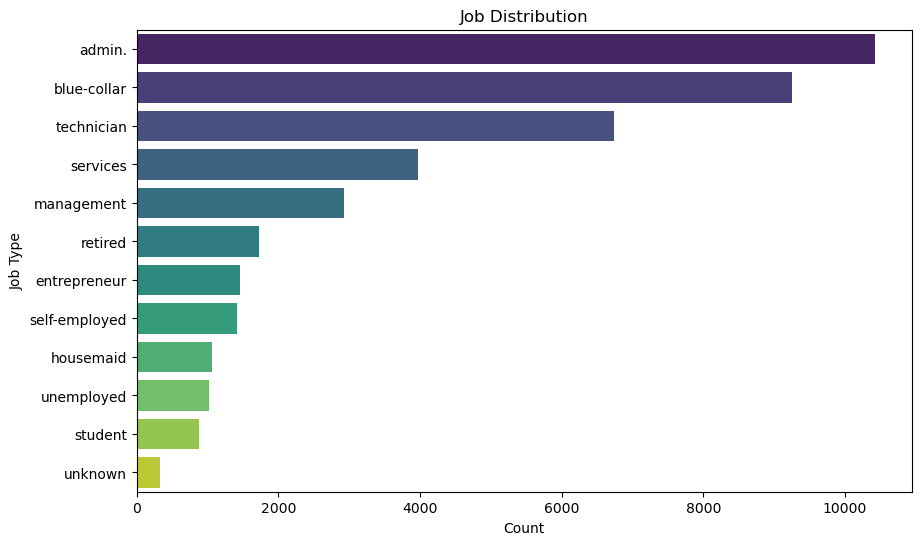

In [48]:
# 2. Job Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index, palette='viridis')
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

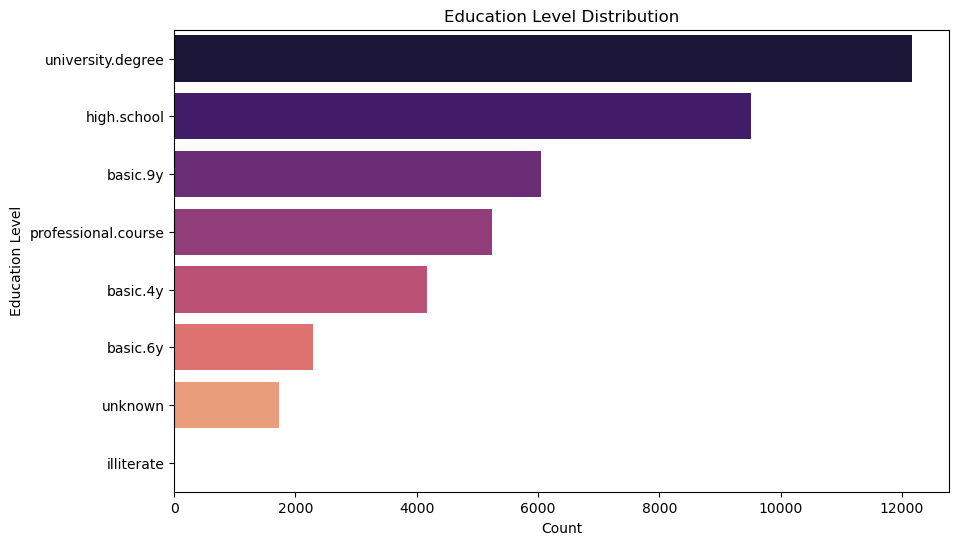

In [49]:
# 3. Education Level Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index, palette='magma')
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

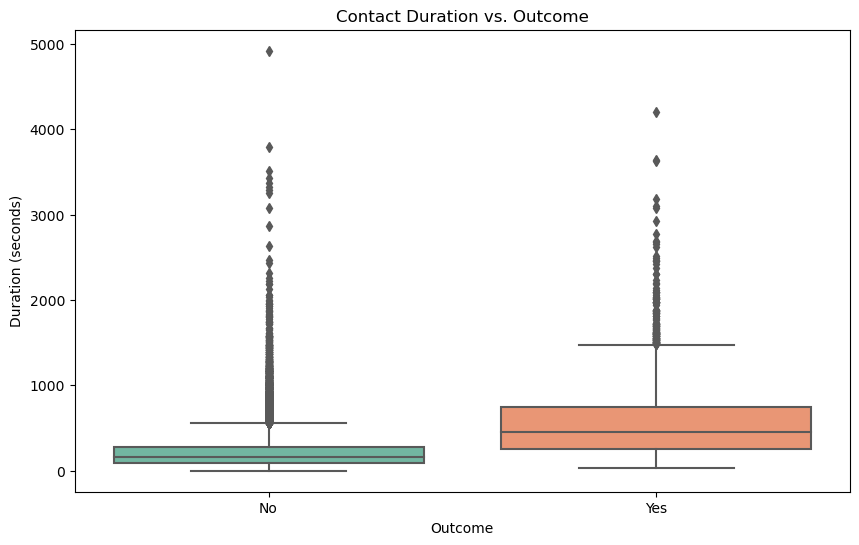

In [50]:
# 4. Contact Duration vs. Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='OUTPUT_LABEL', y='duration', data=df, palette='Set2')
plt.title('Contact Duration vs. Outcome')
plt.xlabel('Outcome')
plt.ylabel('Duration (seconds)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

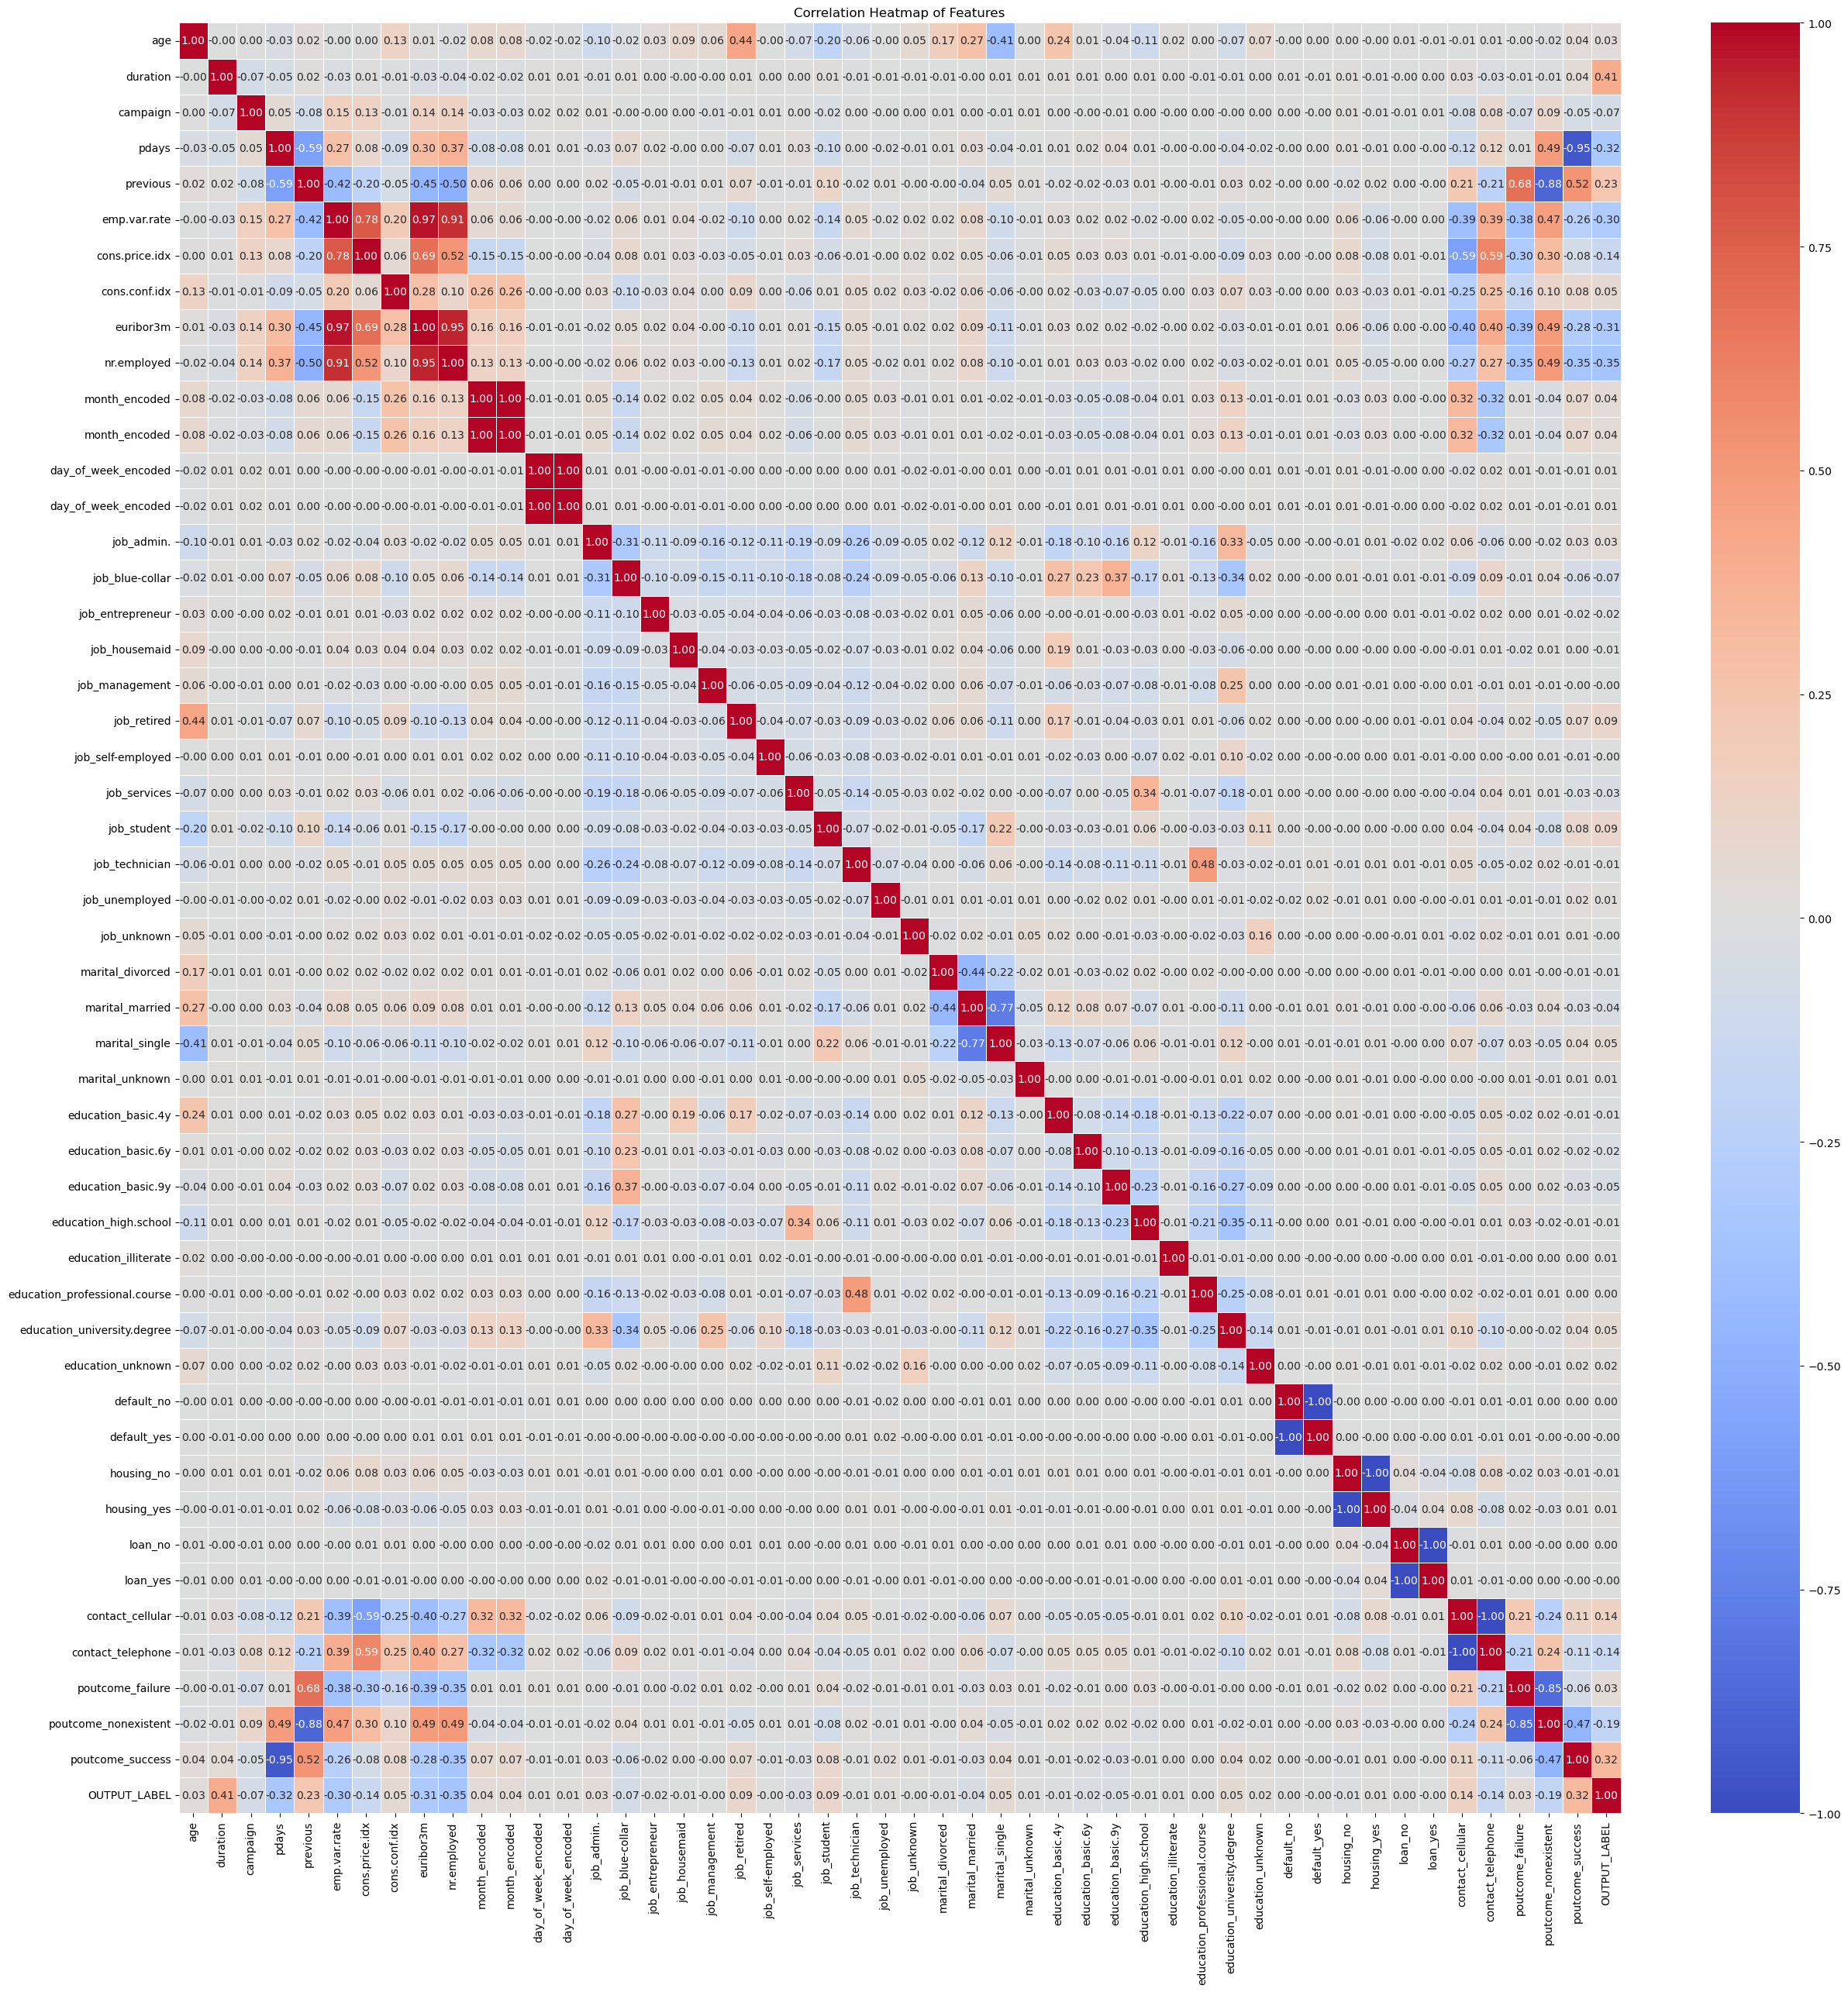

In [51]:
# 5. Correlation Heatmap
plt.figure(figsize=(30, 30))
numeric_data = df_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [52]:
X = df_data.drop('OUTPUT_LABEL', axis=1)  
y = df_data['OUTPUT_LABEL'] 

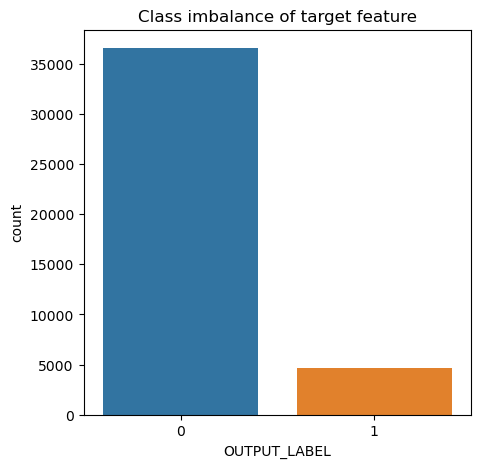

In [53]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=df['OUTPUT_LABEL'])
plt.title('Class imbalance of target feature')
#annot_percent(plot)
plt.show()

In [54]:
# pip install imbalanced-learn scikit-learn

In [55]:
pip install --upgrade imbalanced-learn scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

x_smote, y_smote = smote.fit_resample(X,y)

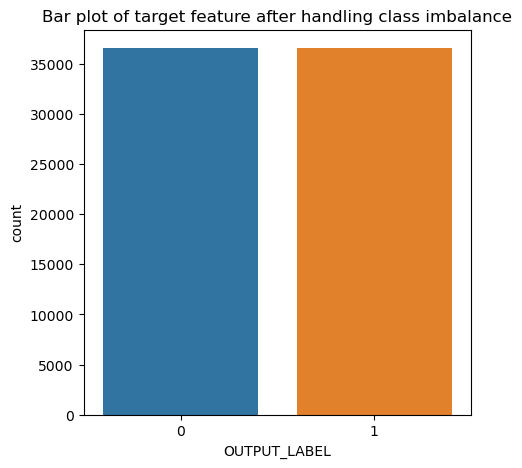

In [58]:
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=y_smote)
plt.title('Bar plot of target feature after handling class imbalance')
# annot_percent(plot)
plt.show()

In [60]:
# X = df_data.drop('OUTPUT_LABEL', axis=1)  
# y = df_data['OUTPUT_LABEL'] 

print(f"Original dataset shape: {X.shape}, {y.shape}")
print(f"Resampled dataset shape: {x_smote.shape}, {y_smote.shape}")

Original dataset shape: (41188, 49), (41188,)
Resampled dataset shape: (73096, 49), (73096,)


In [61]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [62]:
scaler = StandardScaler()

In [63]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [64]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [65]:
model_results = {}
feature_importances = {}

In [66]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model: K-Nearest Neighbors
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


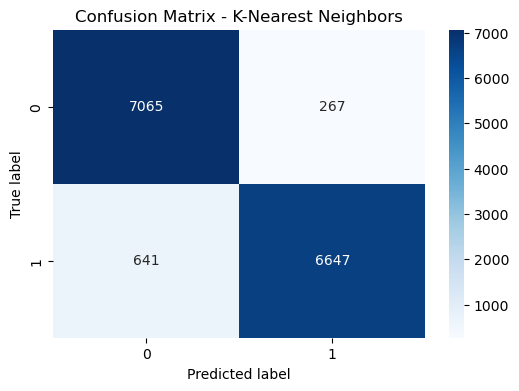

Model: Logistic Regression
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


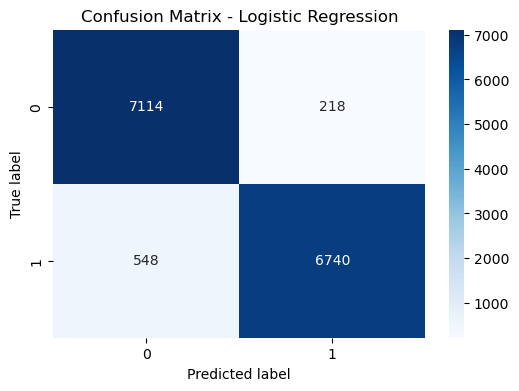

C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayush\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Model: Naive Bayes
Accuracy: 0.50
Precision: 0.25
Recall: 0.50
F1 Score: 0.34


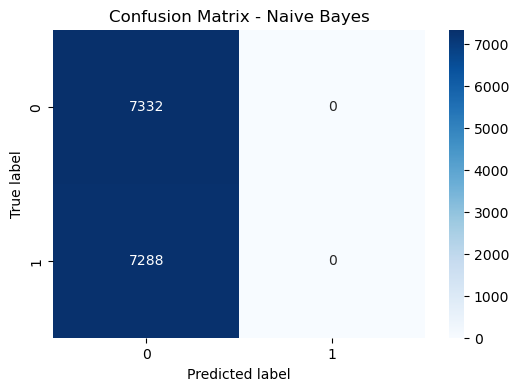

Model: Decision Tree
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


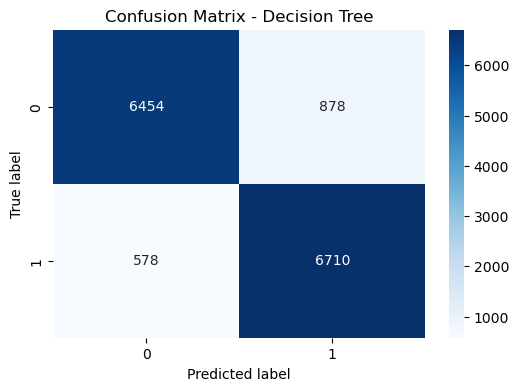

Model: Random Forest
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


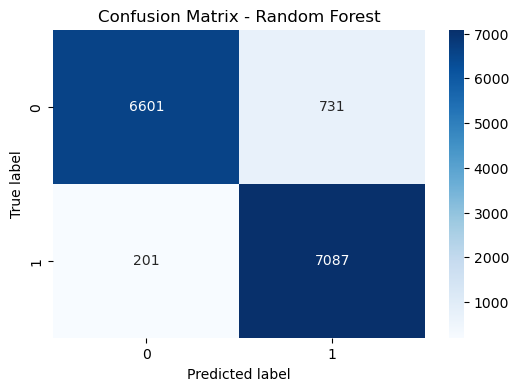

In [67]:
for model_name, model in models.items():
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    
    cm = confusion_matrix(y_test, y_pred)
    
     
    model_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score,
        "Confusion Matrix": cm
    }
    
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, model_name)

In [68]:
results_df = pd.DataFrame(model_results).T
print("\nComparison of Model Performance:")
print(results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']])


Comparison of Model Performance:
                     Accuracy Precision    Recall  F1 Score
K-Nearest Neighbors  0.937893  0.939033  0.937893  0.937848
Logistic Regression  0.947606  0.948513  0.947606  0.947576
Naive Bayes          0.501505  0.251507  0.501505  0.335007
Decision Tree         0.90041  0.901098   0.90041  0.900375
Random Forest        0.936252   0.93857  0.936252  0.936175


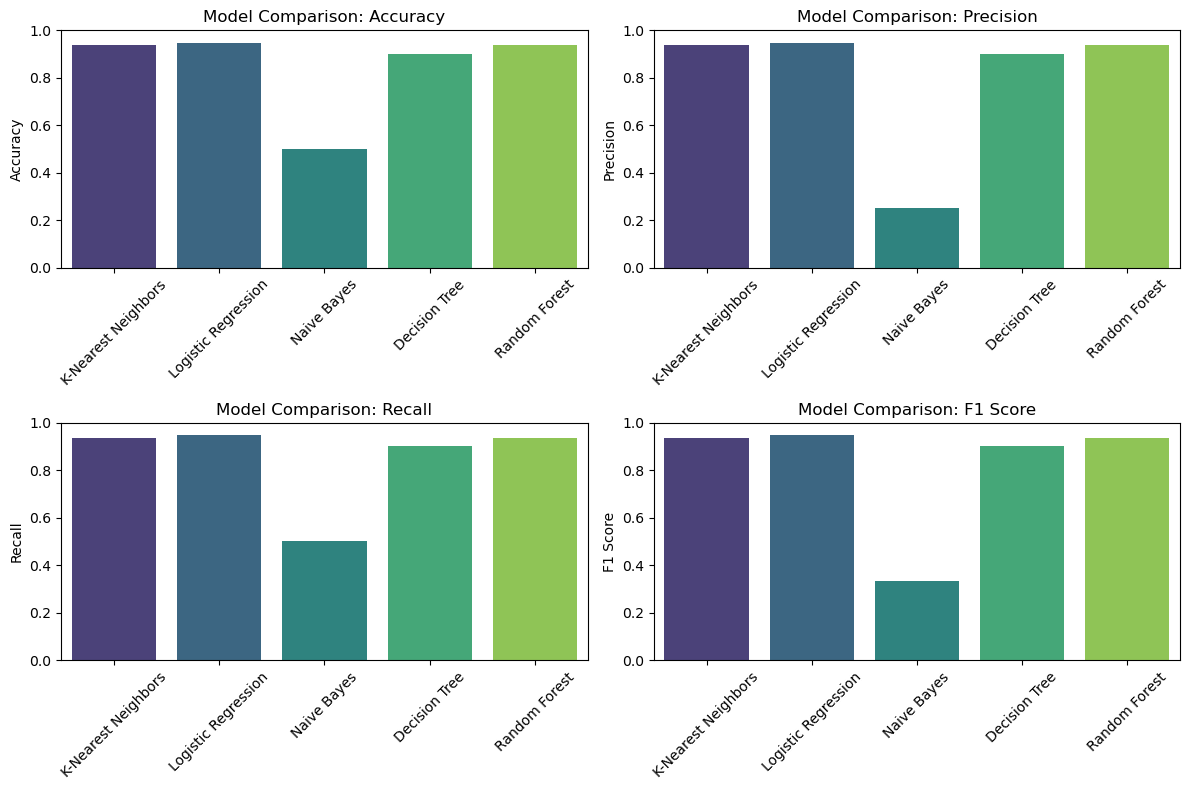

In [69]:
results_df = pd.DataFrame(model_results).T


metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']


plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
    plt.title(f'Model Comparison: {metric}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  

plt.tight_layout()
plt.show()

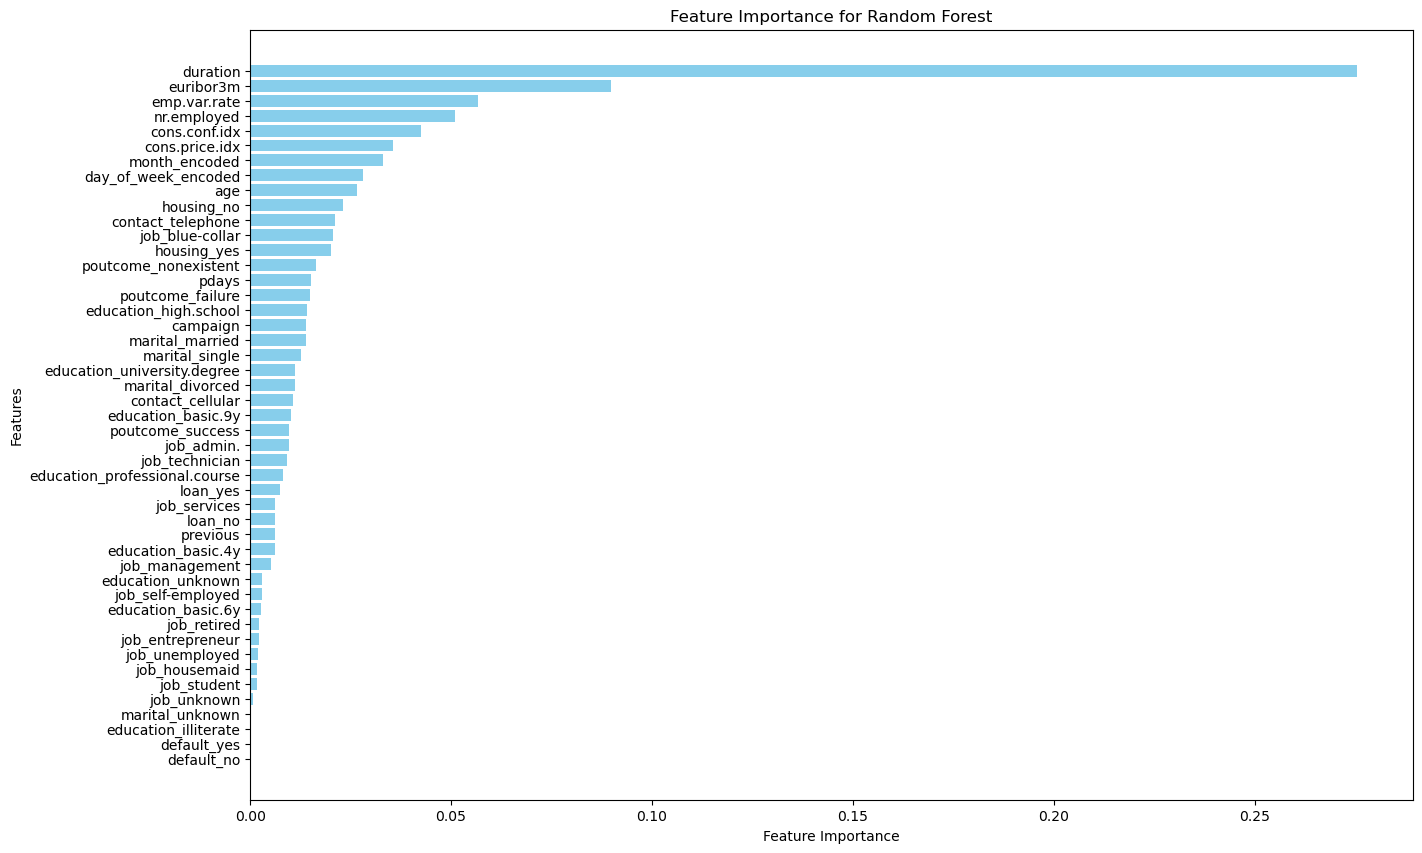

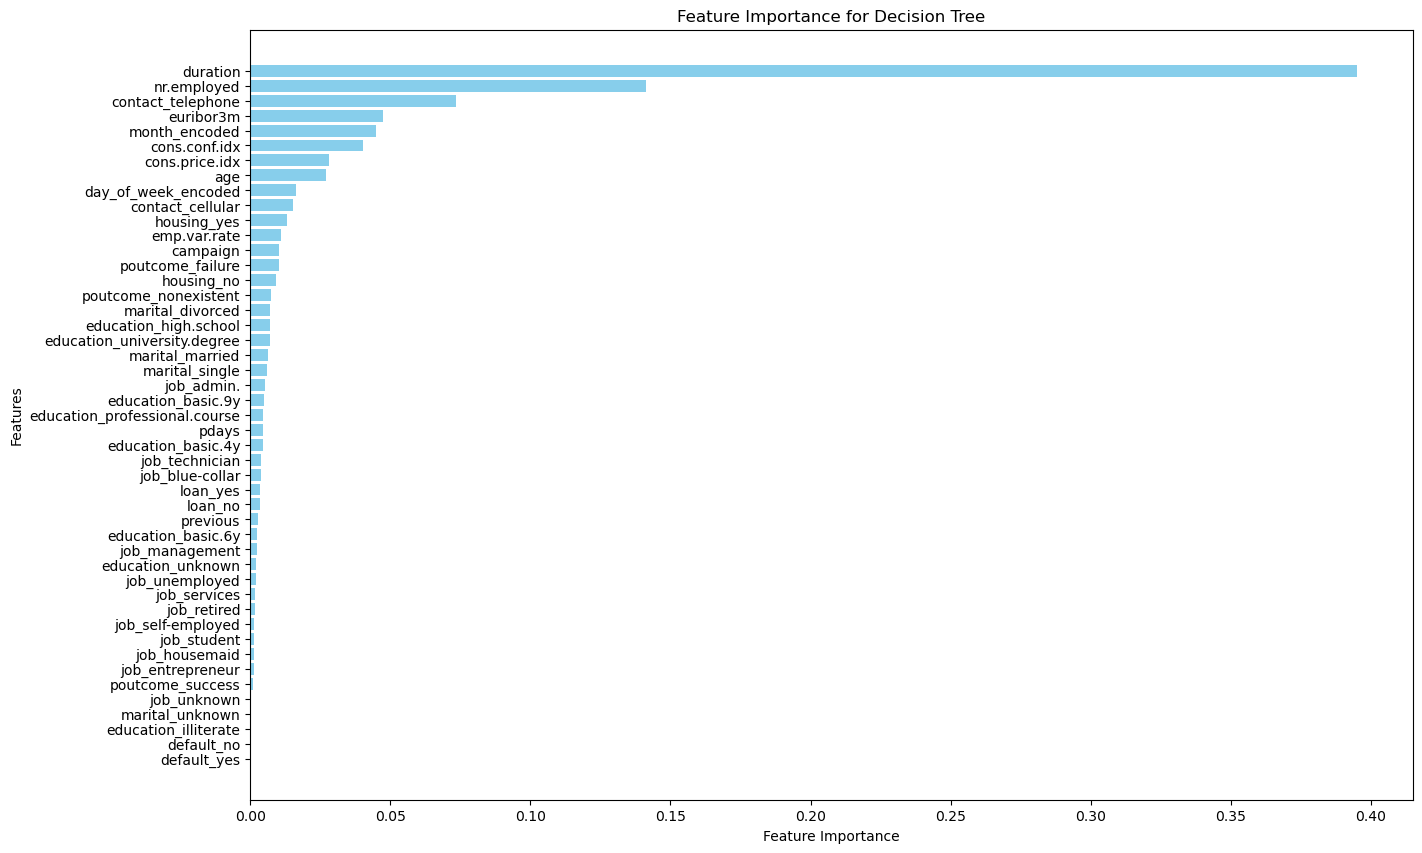

In [70]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
}


feature_importances = {}


for name, model in models.items():
    model.fit(X_train, y_train)  
    if hasattr(model, 'feature_importances_'):
        
        feature_importances[name] = model.feature_importances_


for model_name, importances in feature_importances.items():
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    })
    
    
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
   
    plt.figure(figsize=(15, 10))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importance for {model_name}')
    plt.gca().invert_yaxis()  
    plt.show()